In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as smf

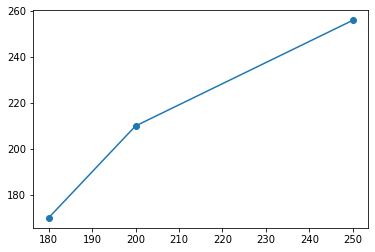

In [2]:
plt.scatter([180,200,250],[170,210,256])
plt.plot([180,200,250],[170,210,256])

# LOGISTIC REGRESSION

In [3]:
df = pd.read_csv('US_Heart_Patients.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.shape

(4240, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
import statsmodels.api as smf  # sm or smf

#### identify the target variable

In [7]:
df['TenYearCHD'].unique()  # tenyearcoronory heart disease, this is our target varible

array([0, 1], dtype=int64)

In [8]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
df['education'].unique()

array([ 4.,  2.,  1.,  3., nan])

In [10]:
df1 = df.dropna()

In [11]:
df1.shape

(3658, 16)

In [12]:
 df.shape[0]-df1.shape[0]

582

In [13]:
# we can drop missing value upto 10-15% of data. here our data is large so no probs

In [14]:
import warnings 
warnings.filterwarnings('ignore')
df1.rename(columns = {'male':'Gender'},inplace = True)

In [15]:
df1.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [16]:
df1.corr()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Gender,1.000000,-0.024412,0.017729,0.206114,0.330322,-0.052124,-0.002312,0.001424,0.013819,-0.070321,-0.045358,0.051872,0.073111,-0.115285,0.002940,0.091688
age,-0.024412,1.000000,-0.159499,-0.210771,-0.189295,0.134732,0.050893,0.306239,0.109092,0.268252,0.388267,0.208283,0.137511,-0.002722,0.118349,0.233983
education,0.017729,-0.159499,1.000000,0.025251,0.013790,-0.013739,-0.030386,-0.078828,-0.039627,-0.013522,-0.124360,-0.058059,-0.137555,-0.064214,-0.031998,-0.063279
currentSmoker,0.206114,-0.210771,0.025251,1.000000,0.773913,-0.051923,-0.038150,-0.108078,-0.041849,-0.051034,-0.134428,-0.115955,-0.159821,0.050841,-0.053242,0.019165
cigsPerDay,0.330322,-0.189295,0.013790,0.773913,1.000000,-0.046504,-0.036286,-0.070460,-0.036961,-0.030400,-0.094781,-0.056746,-0.087395,0.064030,-0.053726,0.052014
BPMeds,-0.052124,0.134732,-0.013739,-0.051923,-0.046504,1.000000,0.113125,0.262910,0.049066,0.094083,0.271263,0.199630,0.105642,0.012889,0.054232,0.089152
prevalentStroke,-0.002312,0.050893,-0.030386,-0.038150,-0.036286,0.113125,1.000000,0.066057,0.009625,0.012736,0.061070,0.055834,0.036496,-0.017019,0.016061,0.048366
prevalentHyp,0.001424,0.306239,-0.078828,-0.108078,-0.070460,0.262910,0.066057,1.000000,0.080556,0.166655,0.697675,0.617734,0.302949,0.146818,0.086942,0.181387
diabetes,0.013819,0.109092,-0.039627,-0.041849,-0.036961,0.049066,0.009625,0.080556,1.000000,0.048451,0.102552,0.050686,0.089009,0.060984,0.614820,0.093431
totChol,-0.070321,0.268252,-0.013522,-0.051034,-0.030400,0.094083,0.012736,0.166655,0.048451,1.000000,0.219925,0.174422,0.121056,0.093053,0.049884,0.091338


In [17]:
y = df1['TenYearCHD']
x = df1.drop('TenYearCHD',axis = 1)

In [18]:
x.shape

(3658, 15)

In [19]:
type(y)

pandas.core.series.Series

In [20]:
xc = smf.add_constant(x)
xc.head()

,const,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,1.0,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1.0,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,1.0,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,1.0,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [21]:
model = smf.Logit(y,xc).fit()
model.summary()


Optimization terminated successfully.
         Current function value: 0.376500
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3642
Method:                           MLE   Df Model:                           15
Date:                Thu, 25 Mar 2021   Pseudo R-squ.:                  0.1175
Time:                        09:13:29   Log-Likelihood:                -1377.2
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 6.676e-69
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3282      0.715    -11.640      0.000      -9.730      -6.926
Gender              0.5553      0.109      5.093      0.000       0.342       0.769
age                 0.0635      0.007      9.509      0.000       0.050       0.077
education          -0.0478      0.049     -0.967      0.334      -0.145       0.049
currentSmoker       0.0716      0.157      0.457      0.648      -0.236       0.379
cigsPerDay          0.0179      0.006      2.872      0.004       0.006       0.030
BPMeds              0.1625      0.234      0.693      0.488      -0.297       0.622
prevalentStroke     0.6937      0.490      1.417      0.157      -0.266       1.653
prevalentHyp        0.2342      0.138      1.697      0.090      -0.036       0.505
diabetes            0.0392      0.316      0.124      0.901      -0.579       0.658
totChol             0.0023      0.001      2.070      0.038       0.000       0.005
sysBP               0.0154      0.004      4.044      0.000       0.008       0.023
diaBP              -0.0042      0.006     -0.646      0.518      -0.017       0.008
BMI                 0.0067      0.013      0.523      0.601      -0.018       0.032
heartRate          -0.0032      0.004     -0.771      0.441      -0.012       0.005
glucose             0.0071      0.002      3.190      0.001       0.003       0.012
===================================================================================
"""

In [22]:
# backward elimination

In [23]:
y = df1['TenYearCHD']
#x_selected = []
cols = list(xc.columns)
for i in range(len(xc.columns)):
    model = smf.Logit(y,xc[cols]).fit()
    p_values =  model.pvalues
    max_p = max(p_values)
    feature_max_p = p_values.idxmax()
    if max_p > 0.05: # this is the threshold we can change video4day1@ 50:38
        cols.remove(feature_max_p)
        print(feature_max_p , max_p)
#x_selected.append(cols)
print(cols[1:])

Optimization terminated successfully.
         Current function value: 0.376500
         Iterations 7
diabetes 0.9012045780435515
Optimization terminated successfully.
         Current function value: 0.376502
         Iterations 7
currentSmoker 0.6483650390923605
Optimization terminated successfully.
         Current function value: 0.376531
         Iterations 7
BMI 0.6296050439469598
Optimization terminated successfully.
         Current function value: 0.376562
         Iterations 7
diaBP 0.5625804781393952
Optimization terminated successfully.
         Current function value: 0.376608
         Iterations 7
BPMeds 0.4697715086532118
Optimization terminated successfully.
         Current function value: 0.376679
         Iterations 7
heartRate 0.4160284129553036
Optimization terminated successfully.
         Current function value: 0.376770
         Iterations 7
education 0.3066346175601108
Optimization terminated successfully.
         Current function value: 0.376914
         Iter

# performance metrics    

In [24]:
cols[1:] 

['Gender', 'age', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']

In [24]:
x_final = df1[cols[1:]] 
x_final

,Gender,age,cigsPerDay,totChol,sysBP,glucose
0,1,39,0.0,195.0,106.0,77.0
1,0,46,0.0,250.0,121.0,76.0
2,1,48,20.0,245.0,127.5,70.0
3,0,61,30.0,225.0,150.0,103.0
4,0,46,23.0,285.0,130.0,85.0
...,...,...,...,...,...,...
4233,1,50,1.0,313.0,179.0,86.0
4234,1,51,43.0,207.0,126.5,68.0
4237,0,52,0.0,269.0,133.5,107.0
4238,1,40,0.0,185.0,141.0,72.0


# stats approach

In [25]:
y = df1['TenYearCHD']
x = x_final

In [26]:
xc = smf.add_constant(x)

In [27]:
model = smf.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.377634
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3651
Method:                           MLE   Df Model:                            6
Date:                Thu, 25 Mar 2021   Pseudo R-squ.:                  0.1148
Time:                        09:14:01   Log-Likelihood:                -1381.4
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 2.408e-74
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1353      0.475    -19.213      0.000     -10.067      -8.203
Gender         0.5617      0.107      5.258      0.000       0.352       0.771
age            0.0660      0.006     10.267      0.000       0.053       0.079
cigsPerDay     0.0192      0.004      4.606      0.000       0.011       0.027
totChol        0.0023      0.001      2.031      0.042    8.01e-05       0.004
sysBP          0.0175      0.002      8.155      0.000       0.013       0.022
glucose        0.0073      0.002      4.343      0.000       0.004       0.011
==============================================================================
"""

In [28]:
model.params

const        -9.135256
Gender        0.561663
age           0.065966
cigsPerDay    0.019227
totChol       0.002280
sysBP         0.017527
glucose       0.007283
dtype: float64

In [29]:
# strong coef is gender
# weak coef is totchol, this will not make influence in predict heart disese,we can remove and run the model again,there is no change in result

In [30]:
x_final.shape, y.shape

((3658, 6), (3658,))

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [33]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2560, 6), (1098, 6), (2560,), (1098,))

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:

y_test.value_counts()

0    916
1    182
Name: TenYearCHD, dtype: int64

In [37]:
from sklearn import metrics as mt

In [38]:
acc_score = mt.accuracy_score(y_test,y_pred)
print(acc_score*100)

84.06193078324226


In [39]:
con_matr = mt.confusion_matrix(y_test,y_pred)
con_matr

array([[908,   8],
       [167,  15]], dtype=int64)

In [40]:
con_matr[1,1]

15

In [41]:
tpr = con_matr[1,1]/con_matr[1:].sum() # sensityvity
tpr*100

8.241758241758241

In [42]:
tnr = con_matr[0,0]/con_matr[0,:].sum()
tnr*100

99.12663755458514

**How do we intrept the confusion matrix**

In [43]:
alpha_error = 3/916
beta_error = 175/182
alpha_error,beta_error
# 908,7 are correct prediction(1-alpha,1-beta)

(0.0032751091703056767, 0.9615384615384616)

In [44]:
np.round(model.coef_,4)

array([[0.5477, 0.0558, 0.0178, 0.0023, 0.0185, 0.0092]])

In [45]:
# how can we imporove score , there are various ways to improve performance of logistic.
# 1. bagging techinique to improve
#2. random forest can be used instead logist reg. we have various stratageis to improve mmodel performance
# we can use random forest to this dataset 

 DAY 2 video 2 @ 23:00

# DECISION TREE

**example:**

In [46]:
df = pd.DataFrame({'salary':[15,17,28,10,40,50,55],'Age':[28,25,30,35,35,32,40],'Loan_defaulter':[1,0,1,1,0,1,0]})
df.index= ['S1','S2','S3','S4','S5','S6','S7']
df

,salary,Age,Loan_defaulter
S1,15,28,1
S2,17,25,0
S3,28,30,1
S4,10,35,1
S5,40,35,0
S6,50,32,1
S7,55,40,0


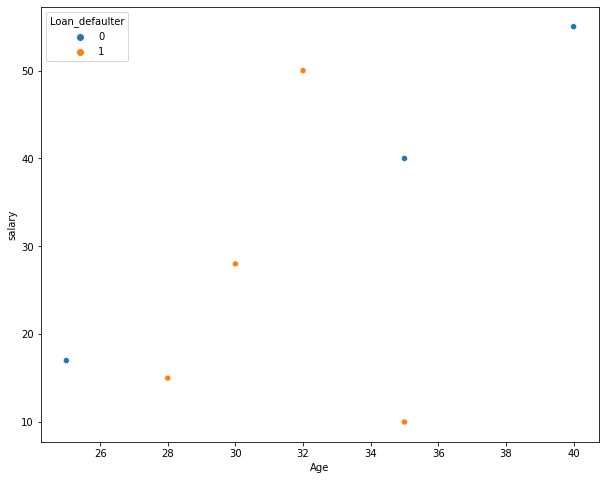

In [47]:
plt.figure(figsize = (10,8))
sns.scatterplot(df['Age'],df['salary'],hue = df['Loan_defaulter'])
plt.show()

In [48]:
df = pd.DataFrame({'Ht':[152,180,167,174,148,172,160,172,165,187],
                  'Age':[45,26,30,34,40,36,19,28,23,32],
                  'Wt':[77,47,55,59,72,60,40,60,44,58]})
                  
df

,Ht,Age,Wt
0,152,45,77
1,180,26,47
2,167,30,55
3,174,34,59
4,148,40,72
5,172,36,60
6,160,19,40
7,172,28,60
8,165,23,44
9,187,32,58


In [49]:
df.index = ['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10']

In [50]:
df['Wt'].mean()

57.2

In [51]:
mse = np.sum((df['Wt']- np.mean(df['Wt']))**2)/len(df['Wt'])
mse

120.96

In [52]:
df[df['Age']>35] #True

,Ht,Age,Wt
S1,152,45,77
S5,148,40,72
S6,172,36,60


In [53]:
df[df['Age']<35] #false

,Ht,Age,Wt
S2,180,26,47
S3,167,30,55
S4,174,34,59
S7,160,19,40
S8,172,28,60
S9,165,23,44
S10,187,32,58


In [54]:
# Depth 0, means its null model
# y_pred = y_bar
# false
df['Wt'].mean() - df[df['Age']<35]["Wt"]

S2     10.2
S3      2.2
S4     -1.8
S7     17.2
S8     -2.8
S9     13.2
S10    -0.8
Name: Wt, dtype: float64

In [55]:
# True
df['Wt'].mean() - df[df['Age']>35]["Wt"]

S1   -19.8
S5   -14.8
S6    -2.8
Name: Wt, dtype: float64

In [56]:
df[df['Age']<35]["Wt"].mean()

51.857142857142854

In [57]:
df[df['Age']>35]["Wt"].mean()

69.66666666666667

In [58]:
df[df['Age']<35]["Wt"].mean() +df[df['Age']>35]["Wt"].mean()

121.52380952380952

In [59]:
mse = np.sum((df[df['Age']<35]["Wt"]-df[df['Age']<35]["Wt"].mean())**2)/7
mse

55.83673469387755

In [60]:
mse = np.sum((df[df['Age']>35]["Wt"]-df[df['Age']>35]["Wt"].mean())**2)/3
mse

50.88888888888889

In [61]:
55.83673469387755+50.88888888888889

106.72562358276645

In [62]:
 #depth 1
# false
df[df['Age']<35]["Wt"] - df[df['Age']<35]["Wt"].mean()

S2     -4.857143
S3      3.142857
S4      7.142857
S7    -11.857143
S8      8.142857
S9     -7.857143
S10     6.142857
Name: Wt, dtype: float64

In [63]:
df[df['Age']<35]['Wt'].where(df['Ht']>170)

S2     47.0
S3      NaN
S4     59.0
S7      NaN
S8     60.0
S9      NaN
S10    58.0
Name: Wt, dtype: float64

In [64]:
df[df['Age']<35]['Wt'].where(df['Ht']<170)

S2      NaN
S3     55.0
S4      NaN
S7     40.0
S8      NaN
S9     44.0
S10     NaN
Name: Wt, dtype: float64

# Decision Tree

In [65]:
df =  pd.read_csv('wisc_bc_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [66]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [68]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [69]:
df.shape

(569, 32)

In [70]:
category_cols = df.columns[df.dtypes == 'object'].tolist()
category_cols

['diagnosis']

In [71]:
df['diagnosis'].replace({'B':0,'M':1},inplace = True)

In [72]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [73]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [74]:
df.drop('id',axis =1,inplace = True)

In [75]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          569 non-null    int64  
 1   radius_mean        569 non-null    float64
 2   texture_mean       569 non-null    float64
 3   perimeter_mean     569 non-null    float64
 4   area_mean          569 non-null    float64
 5   smoothness_mean    569 non-null    float64
 6   compactness_mean   569 non-null    float64
 7   concavity_mean     569 non-null    float64
 8   points_mean        569 non-null    float64
 9   symmetry_mean      569 non-null    float64
 10  dimension_mean     569 non-null    float64
 11  radius_se          569 non-null    float64
 12  texture_se         569 non-null    float64
 13  perimeter_se       569 non-null    float64
 14  area_se            569 non-null    float64
 15  smoothness_se      569 non-null    float64
 16  compactness_se     569 non

In [77]:
import statsmodels.api as smf
y = df['diagnosis']
x = df.drop(columns ='diagnosis',axis =1)

In [78]:
xc =  smf.add_constant(x)
xc.head()

,const,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,1.0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,1.0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,1.0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,1.0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,1.0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [79]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()

In [80]:
model_lor = lor.fit(x,y)
model_lor

LogisticRegression()

In [81]:
model_lor.coef_

array([[-0.80243046, -0.37018597, -0.35219485,  0.01527398,  0.02852582,
         0.13678042,  0.19178769,  0.08056729,  0.03960489,  0.00781096,
        -0.0339426 , -0.30534524, -0.09771767,  0.10360446,  0.0026096 ,
         0.02966338,  0.04120986,  0.01053752,  0.0095954 ,  0.00273314,
        -0.85076708,  0.45014903,  0.27231799,  0.01373277,  0.05208337,
         0.4286156 ,  0.53346621,  0.15549743,  0.1266224 ,  0.04084982]])

In [82]:
model_lor.intercept_

array([-0.14814068])

In [83]:
y_pred = model_lor.predict_proba(x)
y_pred

array([[0.99897133, 0.00102867],
       [0.99333   , 0.00667   ],
       [0.97974832, 0.02025168],
       ...,
       [0.66507209, 0.33492791],
       [0.99443359, 0.00556641],
       [0.00432684, 0.99567316]])

# Decision Tree Classifier

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dtc = DecisionTreeClassifier(criterion = 'entropy',random_state = 0) # why random state = 0 @ day2 video3 @ 42:00
model_dtc = dtc.fit(x,y)
model_dtc

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [86]:
from sklearn import metrics as mt 

In [87]:
from sklearn.model_selection import KFold,cross_val_score


In [88]:
kf = KFold(n_splits = 5,shuffle = True,random_state = 0)
kf

KFold(n_splits=5, random_state=0, shuffle=True)



[array([0.99087399, 0.9875    , 0.99110829, 0.99649   , 0.98323846])]


Logistic :
 0.9898421464764973 
 2.398902425834224e-05


[array([0.91295191, 0.94121622, 0.95315973, 0.95401895, 0.93659077])]


Decision(FGDT) :
 0.9395875163548254 
 0.00027839000324921985


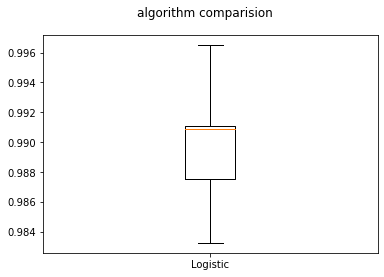

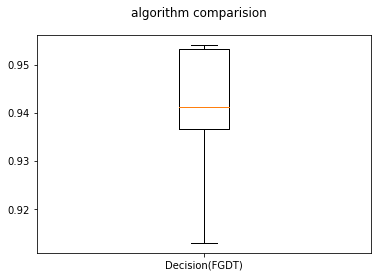

In [89]:
for model,model_name in zip([model_lor,model_dtc],['Logistic','Decision(FGDT)']):
    results = []
    kf = KFold(n_splits = 5,shuffle = True,random_state = 0)
    cv_results = cross_val_score(model,x,y,cv = kf,scoring = 'roc_auc')
    results.append(cv_results)
    print('\n')
    print(results)
    print('\n')
    print(model_name,':\n',np.mean(cv_results),'\n',np.var(cv_results,ddof =1))
    
# boxplot algorithm comparision
    fig = plt.figure()
    fig.suptitle('algorithm comparision')
    ax = fig.add_subplot(1,1,1)
    plt.boxplot(results)
    ax.set_xticklabels([model_name])
plt.show()
    

# Decision Tree 

video 4 day 2 @ 6:00

In [90]:
dtc = DecisionTreeClassifier(criterion='gini',random_state=0)

In [91]:
model_dtc = dtc.fit(x,y)
model_dtc

DecisionTreeClassifier(random_state=0)

In [92]:
from IPython.display import Image
from sklearn import tree
from os import system

In [93]:
BC_Tree_File = open('wisc_bc_data.dot','w')
dot_data = tree.export_graphviz(dtc,out_file=BC_Tree_File,
                               feature_names=list(x),class_names= ['B','M'])
BC_Tree_File.close()

In [94]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [95]:
pd.DataFrame(model_dtc.feature_importances_,index = x.columns,columns = ['Imp'])

,Imp
radius_mean,0.000000
texture_mean,0.000000
perimeter_mean,0.005639
area_mean,0.000000
smoothness_mean,0.007017
compactness_mean,0.000000
concavity_mean,0.000000
points_mean,0.014410
symmetry_mean,0.000000
dimension_mean,0.000000


# DT regularisation

#### post pruning

In [96]:
dtc_reg= DecisionTreeClassifier(max_depth=5,criterion='entropy',random_state=0)
dtc_reg

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)



[array([0.99087399, 0.9875    , 0.99110829, 0.99649   , 0.98323846])]


Logistic :
 0.9898421464764973 
 2.398902425834224e-05


[array([0.94594595, 0.91621622, 0.95633534, 0.95401895, 0.907179  ])]


Decision(FGDT) :
 0.9359390922734907 
 0.0005147900848520656


[array([0.92506143, 0.92820946, 0.95236583, 0.94734995, 0.96078431])]


DT_Reg :
 0.9427541952037357 
 0.00024079327411330383


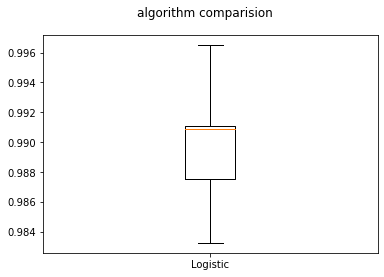

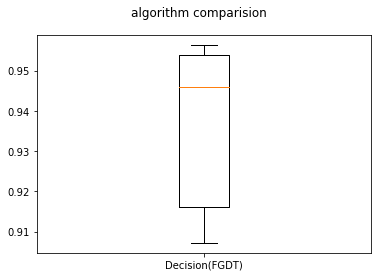

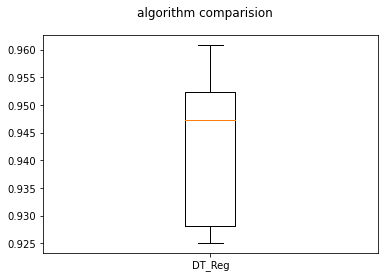

In [97]:
for model,model_name in zip([model_lor,model_dtc,dtc_reg],['Logistic','Decision(FGDT)','DT_Reg']):
    results = []
    kf = KFold(n_splits = 5,shuffle = True,random_state = 0)
    cv_results = cross_val_score(model,x,y,cv = kf,scoring = 'roc_auc')
    results.append(cv_results)
    print('\n')
    print(results)
    print('\n')
    print(model_name,':\n',np.mean(cv_results),'\n',np.var(cv_results,ddof=1))
# boxplot algorithm comparision
    fig = plt.figure()
    fig.suptitle('algorithm comparision')
    ax = fig.add_subplot(1,1,1)
    plt.boxplot(results)
    ax.set_xticklabels([model_name ])
plt.show()

# Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
rfc = RandomForestClassifier(n_estimators=10,random_state=0)

In [100]:
model_rfc  = rfc.fit(x,y)
model_rfc

RandomForestClassifier(n_estimators=10, random_state=0)



[array([0.99087399, 0.9875    , 0.99110829, 0.99649   , 0.98323846])]
Logistic :
 0.9898421464764973 
 2.398902425834224e-05


[array([0.99087399, 0.9875    , 0.99110829, 0.99649   , 0.98323846]), array([0.94594595, 0.91621622, 0.95633534, 0.95401895, 0.907179  ])]
Decision(FGDT) :
 0.9359390922734907 
 0.0005147900848520656


[array([0.99087399, 0.9875    , 0.99110829, 0.99649   , 0.98323846]), array([0.94594595, 0.91621622, 0.95633534, 0.95401895, 0.907179  ]), array([0.92506143, 0.92820946, 0.95236583, 0.94734995, 0.96078431])]
DT_Reg :
 0.9427541952037357 
 0.00024079327411330383


[array([0.99087399, 0.9875    , 0.99110829, 0.99649   , 0.98323846]), array([0.94594595, 0.91621622, 0.95633534, 0.95401895, 0.907179  ]), array([0.92506143, 0.92820946, 0.95236583, 0.94734995, 0.96078431]), array([0.97367497, 0.99358108, 0.97570657, 0.98982099, 0.98782416])]
RFC :
 0.9841215560030558 
 7.890461593722377e-05


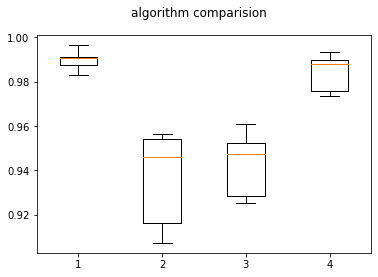

In [101]:
from sklearn.model_selection import KFold,cross_val_score
results = []
for model,model_name in zip([model_lor,model_dtc,dtc_reg,model_rfc],['Logistic','Decision(FGDT)','DT_Reg','RFC']):
    kf = KFold(n_splits=5,shuffle=True,random_state=0)
    cv_results = cross_val_score(model,x,y,cv=kf,scoring ='roc_auc')
    results.append(cv_results)
    print('\n')
    print(results)
    print(model_name,':\n',np.mean(cv_results),'\n',np.var(cv_results,ddof=1))
    
    # boxplot algorithm comparision
fig = plt.figure()
fig.suptitle('algorithm comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
#ax.set_xticklabels([model_name])
plt.show()

In [102]:
model_rfc.feature_importances_

array([0.02099766, 0.01186927, 0.0092272 , 0.02322576, 0.00277179,
       0.00199352, 0.08617969, 0.14619054, 0.00193072, 0.00117574,
       0.04914218, 0.0039925 , 0.00650007, 0.18385855, 0.01400552,
       0.00057959, 0.004729  , 0.00837225, 0.00635538, 0.00350205,
       0.10648231, 0.02000758, 0.078171  , 0.01987087, 0.01399032,
       0.01359626, 0.0090657 , 0.12413167, 0.00921323, 0.01887209])

In [103]:
pd.DataFrame(model_rfc.feature_importances_,columns =['IMP'],index = x.columns)

,IMP
radius_mean,0.020998
texture_mean,0.011869
perimeter_mean,0.009227
area_mean,0.023226
smoothness_mean,0.002772
compactness_mean,0.001994
concavity_mean,0.086180
points_mean,0.146191
symmetry_mean,0.001931
dimension_mean,0.001176


# KNN

video 0 day 3 @ 1:00

In [104]:
from sklearn.neighbors import KNeighborsClassifier

In [105]:
df = pd.read_csv('Dataset_spine.csv')
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [106]:
df.drop('Unnamed: 13',axis = 1,inplace = True)

In [107]:
df.columns= ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','State']

In [108]:
df.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,State
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  State                     310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [110]:
df['State'].value_counts()

Abnormal    210
Normal      100
Name: State, dtype: int64

In [111]:
df['State'].replace({'Abnormal': 1 ,'Normal':0},inplace = True)

In [112]:
df['State'].value_counts()

1    210
0    100
Name: State, dtype: int64

In [113]:
df.corr()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,State
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251,0.353336
pelvic tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550,0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054,0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853,0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145,-0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023,0.443687
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893,0.055865
Direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021,-0.039591
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541,-0.049354
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243,0.100044


In [114]:
df.shape

(310, 13)

In [115]:
df0 = df[df['State'] == 0]
df1 = df[df['State'] ==1]

In [116]:
from scipy.stats import ttest_ind

In [117]:
for i in df.columns[:-1]:
    print('\n')
    print(i, ':','tstat',',','pvalue','\n',st.ttest_ind(df0[i],df[i]))

    



pelvic_incidence : tstat , pvalue 
 Ttest_indResult(statistic=-4.7323770976322805, pvalue=3.064465123046062e-06)


pelvic tilt : tstat , pvalue 
 Ttest_indResult(statistic=-4.401230298487826, pvalue=1.376115363180003e-05)


lumbar_lordosis_angle : tstat , pvalue 
 Ttest_indResult(statistic=-4.226713254793916, pvalue=2.928473924943914e-05)


sacral_slope : tstat , pvalue 
 Ttest_indResult(statistic=-2.8210059785258226, pvalue=0.005021107003391351)


pelvic_radius : tstat , pvalue 
 Ttest_indResult(statistic=4.1827931152936, pvalue=3.527390837844827e-05)


degree_spondylolisthesis : tstat , pvalue 
 Ttest_indResult(statistic=-6.385157120414638, pvalue=4.665844523741432e-10)


pelvic_slope : tstat , pvalue 
 Ttest_indResult(statistic=-0.7034546049058076, pvalue=0.4821737190869957)


Direct_tilt : tstat , pvalue 
 Ttest_indResult(statistic=0.49516784318584506, pvalue=0.6207482115473608)


thoracic_slope : tstat , pvalue 
 Ttest_indResult(statistic=0.6321438692688207, pvalue=0.52764693418

In [118]:
y = df['State']
x = df.drop('State',axis=1)

**step 2 : need to scale the data**

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
sc = StandardScaler()
x = sc.fit_transform(x) # no need to transforem y here,bcz already in 0 and 1
x

array([[ 0.14708636,  0.50136873, -0.6651769 , ...,  1.1671291 ,
        -1.19658726,  1.71236843],
       [-1.24586434, -0.74876898, -1.45300075, ...,  1.67955123,
        -0.94032533, -0.91394145],
       [ 0.4843695 ,  0.46793218, -0.09926175, ...,  1.63596949,
        -1.22717809, -0.61568643],
       ...,
       [ 0.05520137,  0.51561812, -0.31097748, ..., -1.05158278,
         1.44337397, -0.69303204],
       [-0.88582307, -0.88565951, -0.55861259, ..., -0.75264852,
         1.62384854,  0.77376463],
       [-1.54892681, -1.24785954, -0.82539423, ...,  0.62174631,
         1.29742294,  1.43371339]])

**Step2 : perform Gridsearch**

In [121]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
params = {'n_neighbors': np.arange(1,50),'weights': ['uniform','distance']}
GS =  GridSearchCV(knn,params,cv= 3,scoring='roc_auc')
GS.fit(x,y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [122]:
GS.best_params_

{'n_neighbors': 21, 'weights': 'distance'}

In [123]:
knn = KNeighborsClassifier(n_neighbors =  49, weights =  'uniform')
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=49)

In [124]:
cv_results = cross_val_score(knn,x,y,scoring='roc_auc')
cv_results

array([0.4875    , 0.82916667, 0.88154762, 0.94880952, 0.93035714])

In [125]:
cv_results.mean()

0.8154761904761904

In [126]:
cv_results.var()

0.028619331065759646

**Comparision of all models**

In [127]:
y = df['State']
x = df.drop('State',axis = 1)

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [129]:
model_lor = LogisticRegression()
model_dtc = DecisionTreeClassifier(random_state = 0)
model_knn = KNeighborsClassifier()
model_rfc = RandomForestClassifier(n_estimators=10,random_state=0)

In [130]:
# gridsearch for best params

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
params_dt = {'criterion':['entropy','gini']}

In [133]:
GS_dt  =  GridSearchCV(model_dtc,params_dt, cv = 3,scoring = 'roc_auc')
GS_dt.fit(x,y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini']}, scoring='roc_auc')

In [134]:
GS_dt.best_params_

{'criterion': 'entropy'}

**With scaling of x**

In [135]:
params_knn=  {'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}

In [136]:
GS_knn = GridSearchCV(model_knn,params_knn,cv =3,scoring='roc_auc')
GS_knn.fit(x,y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [137]:
GS_knn.best_params_

{'n_neighbors': 49, 'weights': 'uniform'}

**Without scaling of x**

In [138]:
y = df['State']
x = df.drop('State',axis =1)

In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [140]:
knn1 = KNeighborsClassifier()

In [141]:
params_knn1=  {'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}

In [142]:
from sklearn.model_selection import GridSearchCV
GS_knn1 = GridSearchCV(knn1,params_knn1,cv = 3,scoring = 'roc_auc')
GS_knn1.fit(x,y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [143]:
GS_knn1.best_params_

{'n_neighbors': 49, 'weights': 'uniform'}

In [144]:
y = df['State']
x = df.drop('State',axis =1 )

**video 3 day 3 @33:00**

**Kfold comparision**

In [145]:
model_lor = LogisticRegression()
model_dtc_final = DecisionTreeClassifier(criterion='entropy',random_state = 0)
model_knn_final = KNeighborsClassifier(n_neighbors=21,weights = 'distance')
model_knn1_final = KNeighborsClassifier(n_neighbors=49,weights = 'uniform')
model_rfc = RandomForestClassifier(n_estimators=9,random_state=0)

In [146]:
models = []
models.append(('LOR',model_lor))
models.append(('DTC',model_dtc_final))
models.append(('KNN1_without_scaling(unweighted)',model_knn1_final))
models.append(('KNN_with_scaling(weighted)',model_knn_final))
models.append(('RFC',model_rfc))

LOR : 
 mean : 0.9202320991185194 
 var : 0.0009899945102923974 

DTC : 
 mean : 0.8418439447855669 
 var : 0.009665728370615499 

KNN1_without_scaling(unweighted) : 
 mean : 0.8634816796635062 
 var : 0.007322701976750641 

KNN_with_scaling(weighted) : 
 mean : 0.8761871616614646 
 var : 0.00604439021998262 

RFC : 
 mean : 0.8761307870194306 
 var : 0.0050753909000026435 



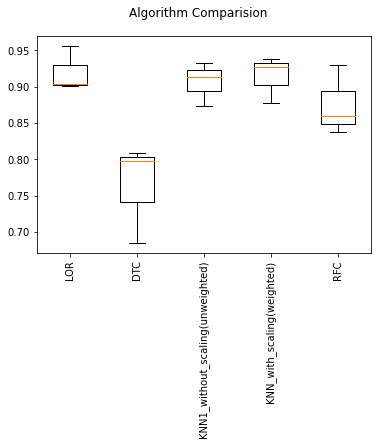

In [147]:
from sklearn.model_selection import KFold
results = []
names = []
for model_name,model in models:
    kf = KFold(n_splits=3,shuffle=True,random_state=0)
    cv_results = cross_val_score(model,df.drop('State',axis =1),y,cv = kf,scoring= 'roc_auc' )
    results.append(cv_results)
    names.append(model_name)
    print(model_name,':','\n','mean :',np.mean(results),'\n','var :',np.var(results,ddof = 1),'\n')

    
# Algo comparision
fig  = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,rotation = 90)
plt.show()

# Naive's Bayes classification model

In [148]:
import numpy as np
import pandas as pd

In [149]:
df_iris = pd.read_csv('Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [150]:
df_iris.drop(['Id','SepalLengthCm','SepalWidthCm'],axis = 1,inplace = True)

In [151]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [152]:
for i in df_iris.columns[:-1]:
    df_iris[i] = sc.fit_transform(df_iris[[i]])
print(df_iris.head())

   PetalLengthCm  PetalWidthCm      Species
0      -1.341272     -1.312977  Iris-setosa
1      -1.341272     -1.312977  Iris-setosa
2      -1.398138     -1.312977  Iris-setosa
3      -1.284407     -1.312977  Iris-setosa
4      -1.341272     -1.312977  Iris-setosa


In [154]:
df_seto = df_iris.get_group('Iris-setosa')
df_vir = df_iris.get_group('Iris-virginica')
df_versi = df_iris.get_group('Iris-versicolor')

AttributeError: 'DataFrame' object has no attribute 'get_group'

In [155]:
df_seto.describe()

NameError: name 'df_seto' is not defined

In [ ]:
df_vir.describe()

In [ ]:
df_versi.describe()

In [ ]:

test1 = [0.53529, 0.5276] # Testing versicolor  sample
test2 = [-1.398,-1.3129] #Testing setosa sample
test3 = [1.04,1.185] #Testing virginica sample

In [ ]:
def my_gpdf(x,mean,sd):
    exponent = np.exp(((x-mean)**2/(2*sd**2)))
    return (1/(np.sqrt(2*np.pi)*sd))*exponent

In [ ]:
# 1.
p_seto = my_gpdf(test1[0],1.46,0.17)*my_gpdf(test1[1],0.24,0.010)
p_seto

In [ ]:
p_versi = my_gpdf(test1[0],4.26,0.46)*my_gpdf(test1[1],1.32,0.19)
p_versi

In [ ]:
p_vir = my_gpdf(test1[0],5.55,0.55)*my_gpdf(test1[1],2.02600,0.027465)
p_vir

In [ ]:
# np.argmax()

In [ ]:
from sklearn.naive_bayes import GaussianNB

# KNN 
implementation

In [156]:
df = pd.read_csv('play_tennis.csv')
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [157]:
df.drop('day',axis =1 ,inplace = True)

In [158]:
df.head()

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [159]:
pd.DataFrame(df.value_counts())

0
outlook  temp humidity wind   play   
Sunny    Mild Normal   Strong Yes   1
              High     Weak   No    1
         Hot  High     Weak   No    1
                       Strong No    1
         Cool Normal   Weak   Yes   1
Rain     Mild Normal   Weak   Yes   1
              High     Weak   Yes   1
                       Strong No    1
         Cool Normal   Weak   Yes   1
                       Strong No    1
Overcast Mild High     Strong Yes   1
         Hot  Normal   Weak   Yes   1
              High     Weak   Yes   1
         Cool Normal   Strong Yes   1

**Encode the feature**

In [160]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [161]:
for i in df.columns:
    df[i]= le.fit_transform(df[[i]])

In [162]:
df.head()

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [163]:
df.shape

(14, 5)

In [164]:
from sklearn.neighbors import KNeighborsClassifier

In [165]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

**perfrom GridsearchCV to get best params**

In [166]:
y = df['play']
x = df.drop('play',axis = 1)

**To perform Knn model first we have to scale the columns**

In [167]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [168]:
for i in df.columns[:-1]:
    df[i] =  mm.fit_transform(df[[i]])

In [169]:
df.head()

,outlook,temp,humidity,wind,play
0,1.0,0.5,0.0,1.0,0
1,1.0,0.5,0.0,0.0,0
2,0.0,0.5,0.0,1.0,1
3,0.5,1.0,0.0,1.0,1
4,0.5,0.0,1.0,1.0,1


In [177]:
models = []
models.append(('LOR',model_lor))
models.append(('DTC',model_dtc_final))
#models.append(('KNN1_without_scaling(unweighted)',model_knn1_final))
#models.append(('KNN_with_scaling(weighted)',model_knn_final))
models.append(('KNN',knn_final))
models.append(('RFC',model_rfc))


In [171]:
from sklearn.model_selection  import GridSearchCV

In [172]:
params_knn = {'n_neighbors' : np.arange(1,7),'weights': ['uniform','distance']}

In [173]:
GS_knn = GridSearchCV(knn,params_knn,cv = 2, scoring ='roc_auc')
GS_knn.fit(x,y)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [174]:
GS_knn.best_params_

{'n_neighbors': 2, 'weights': 'distance'}

In [175]:
knn_final = KNeighborsClassifier(n_neighbors=4,weights='uniform')


LOR : 
 mean : 0.41666666666666663 
 var : 0.013888888888888892 

DTC : 
 mean : 0.40624999999999994 
 var : 0.007378472222222224 



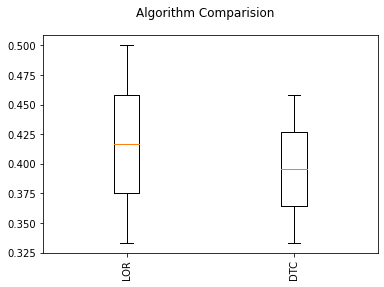

In [176]:
from sklearn.model_selection import KFold
results = []
names = []
for model_name,model in models:
    kf = KFold(n_splits=2,shuffle=True,random_state=0)
    cv_results = cross_val_score(model,x,y,cv = kf,scoring= 'roc_auc' )
    results.append(cv_results)
    names.append(model_name)
    print(model_name,':','\n','mean :',np.mean(results),'\n','var :',np.var(results,ddof = 1),'\n')

    
# Algo comparision
fig  = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,rotation = 90)
plt.show()

In [182]:
knn_final = KNeighborsClassifier(n_neighbors=5,weights='uniform').fit(x,y)


In [183]:
knn_final.predict(x)

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0])

# one

In [184]:
df =pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [185]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [186]:
df.shape

(768, 9)

In [187]:
y = df['Outcome']
x = df.drop('Outcome',axis = 1)

In [188]:
df.corr().iloc[:,-1]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [189]:
import statsmodels.api as sm


In [190]:
xc = sm.add_constant(x)
xc.head()

,const,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,6,148,72,35,0,33.6,0.627,50
1,1.0,1,85,66,29,0,26.6,0.351,31
2,1.0,8,183,64,0,0,23.3,0.672,32
3,1.0,1,89,66,23,94,28.1,0.167,21
4,1.0,0,137,40,35,168,43.1,2.288,33


In [191]:
model = sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Sat, 13 Mar 2021   Pseudo R-squ.:                  0.2718
Time:                        14:12:54   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.4047      0.717    -11.728      0.000      -9.809      -7.000
Pregnancies                  0.1232      0.032      3.840      0.000       0.060       0.186
Glucose                      0.0352      0.004      9.481      0.000       0.028       0.042
BloodPressure               -0.0133      0.005     -2.540      0.011      -0.024      -0.003
SkinThickness                0.0006      0.007      0.090      0.929      -0.013       0.014
Insulin                     -0.0012      0.001     -1.322      0.186      -0.003       0.001
BMI                          0.0897      0.015      5.945      0.000       0.060       0.119
DiabetesPedigreeFunction     0.9452      0.299      3.160      0.002       0.359       1.531
Age                          0.0149      0.009      1.593      0.111      -0.003       0.033
============================================================================================
"""

In [192]:
df_0 = df.groupby('Outcome').get_group(0)
df_1 = df.groupby('Outcome').get_group(1)

In [193]:
from scipy.stats import ttest_ind

In [194]:
st.ttest_ind(df_0['BloodPressure'],df_1['BloodPressure'])

Ttest_indResult(statistic=-1.8047023017353887, pvalue=0.07151390009776082)

In [195]:
# blodpressure is not correlated with outcome so fail to reject reject null, and drop the columns

In [196]:
 st.ttest_ind(df_0['Insulin'],df_1['Insulin'])

Ttest_indResult(statistic=-3.64432538765356, pvalue=0.00028618646036031987)

In [197]:
y = df['Outcome']
x = df.drop(['Outcome','BloodPressure'],axis = 1)

**now scale**

In [198]:
sc=StandardScaler()
x_std = sc.fit_transform(x)

In [199]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [200]:
from sklearn.model_selection import GridSearchCV


In [201]:
params_knn = {'n_neighbors': np.arange(1,100),'weights':['uniform','distance']}

In [202]:
GS_knn = GridSearchCV(knn, params_knn,cv = 5,scoring = 'roc_auc')
GS_knn.fit(x_std,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [203]:
GS_knn.best_params_

{'n_neighbors': 43, 'weights': 'uniform'}

**combine naive and Knn**

In [204]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [205]:
model_knn_final = KNeighborsClassifier(n_neighbors=43,weights='uniform')
NB = GaussianNB()

In [206]:
models  = []
models.append(('KNN', model_knn_final))
models.append(('NaiveBayes',NB))

**KFold comparision**

In [207]:
from sklearn.model_selection import cross_val_score

[0.87005369 0.7904519  0.83978591 0.83223684 0.7864011 ]


('KNN', ':', 0.8237858860195496, 0.0012442265246805158)
[0.83734341 0.78206997 0.81302409 0.86732456 0.77354788]


('NaiveBayes', ':', 0.8146619813619609, 0.0015107713968544455)


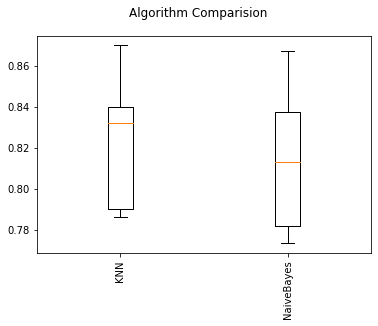

In [208]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle=True,random_state =0)
results =[]
names = []
for name,model in models:
    cv_results = cross_val_score(model,x_std,y,cv = kf,scoring = 'roc_auc')
    print(cv_results)
    results.append(cv_results)
    names.append(name)
    print('\n')
    print((name, ':',np.mean(cv_results),np.var(cv_results,ddof=1)))
# Algo comparision
fig  = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,rotation = 90)
plt.show()    
    

    
    

***KNN having less bais and less varinace compared to NB***

### now compare with other models too

In [209]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [210]:
model_dtc = DecisionTreeClassifier(random_state = 0)
model_rfc = RandomForestClassifier(n_estimators= 40)

**perforn Gscv**

In [211]:
from sklearn.model_selection import GridSearchCV

In [212]:
params_dtc = {'criterion':['entropy','gini']}

In [213]:
GS_dtc = GridSearchCV(model_dtc,params_dtc,cv =5,scoring='roc_auc')
GS_dtc.fit(x_std,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini']}, scoring='roc_auc')

In [214]:
GS_dtc.best_params_

{'criterion': 'gini'}

In [215]:
model_lor = LogisticRegression()

In [216]:
model_dtf_final = DecisionTreeClassifier(criterion='gini')

In [217]:
models  = []
models.append(('KNN', model_knn_final))
models.append(('NaiveBayes',NB))
models.append(('DTC',model_dtc_final))
models.append(('RFC',model_rfc))
models.append(('LOR',model_lor))

[0.87005369 0.7904519  0.83978591 0.83223684 0.7864011 ]


('KNN', ':', 0.8237858860195496, 0.0012442265246805158)
[0.83734341 0.78206997 0.81302409 0.86732456 0.77354788]


('NaiveBayes', ':', 0.8146619813619609, 0.0015107713968544455)
[0.66573872 0.68877551 0.6764496  0.69078947 0.65894819]


('DTC', ':', 0.6761402985147726, 0.00019452598480441545)
[0.85195864 0.79200073 0.82444246 0.83881579 0.80151099]


('RFC', ':', 0.8217457218647428, 0.0006264222634648997)
[0.87273812 0.82233965 0.82247993 0.82035819 0.8222135 ]


('LOR', ':', 0.8320258771221345, 0.0005187131190009785)


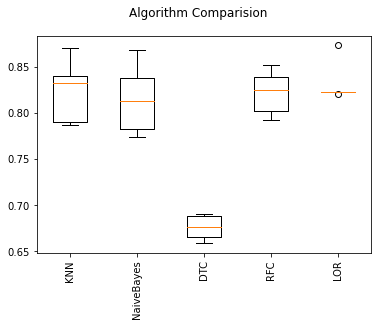

In [218]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle=True,random_state =0)
results =[]
names = []
for name,model in models:
    cv_results = cross_val_score(model,x_std,y,cv = kf,scoring = 'roc_auc')
    print(cv_results)
    results.append(cv_results)
    names.append(name)
    print('\n')
    print((name, ':',np.mean(cv_results),np.var(cv_results,ddof=1)))
# Algo comparision
fig  = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,rotation = 90)
plt.show()

In [219]:
#DAY4


# ALL MODELS

In [220]:
df = pd.read_csv('US_Heart_Patients.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [221]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [222]:
df.shape

(4240, 16)

In [223]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [224]:
df1 = df.dropna()
df1.shape

(3658, 16)

In [225]:
import warnings
warnings.filterwarnings('ignore')

In [226]:
df1.rename(columns = {'male':'Gender'},inplace = True)

In [227]:
df1.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [228]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB


In [229]:
df1.corr().iloc[:,-1]

Gender             0.091688
age                0.233983
education         -0.063279
currentSmoker      0.019165
cigsPerDay         0.052014
BPMeds             0.089152
prevalentStroke    0.048366
prevalentHyp       0.181387
diabetes           0.093431
totChol            0.091338
sysBP              0.222821
diaBP              0.150124
BMI                0.082055
heartRate          0.020514
glucose            0.121990
TenYearCHD         1.000000
Name: TenYearCHD, dtype: float64

In [230]:
y = df1['TenYearCHD']
x = df1.drop('TenYearCHD',axis =1)

In [231]:
import statsmodels.api as sm
xc = sm.add_constant(x)
xc.head()

,const,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,1.0,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1.0,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,1.0,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,1.0,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [232]:
model = sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.376500
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3642
Method:                           MLE   Df Model:                           15
Date:                Sat, 13 Mar 2021   Pseudo R-squ.:                  0.1175
Time:                        14:13:20   Log-Likelihood:                -1377.2
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 6.676e-69
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3282      0.715    -11.640      0.000      -9.730      -6.926
Gender              0.5553      0.109      5.093      0.000       0.342       0.769
age                 0.0635      0.007      9.509      0.000       0.050       0.077
education          -0.0478      0.049     -0.967      0.334      -0.145       0.049
currentSmoker       0.0716      0.157      0.457      0.648      -0.236       0.379
cigsPerDay          0.0179      0.006      2.872      0.004       0.006       0.030
BPMeds              0.1625      0.234      0.693      0.488      -0.297       0.622
prevalentStroke     0.6937      0.490      1.417      0.157      -0.266       1.653
prevalentHyp        0.2342      0.138      1.697      0.090      -0.036       0.505
diabetes            0.0392      0.316      0.124      0.901      -0.579       0.658
totChol             0.0023      0.001      2.070      0.038       0.000       0.005
sysBP               0.0154      0.004      4.044      0.000       0.008       0.023
diaBP              -0.0042      0.006     -0.646      0.518      -0.017       0.008
BMI                 0.0067      0.013      0.523      0.601      -0.018       0.032
heartRate          -0.0032      0.004     -0.771      0.441      -0.012       0.005
glucose             0.0071      0.002      3.190      0.001       0.003       0.012
===================================================================================
"""

In [233]:
model.pvalues.idxmax()

'diabetes'

In [234]:
len(xc.columns)

16

In [235]:
len(df1.columns)

16

In [236]:
#backward elimination

In [237]:
#y = df1['TenYearCHD']
cols = list(xc.columns)
x_final = []
for i in xc.columns:
    model = sm.Logit(y,xc[cols]).fit()
    p_values = model.pvalues
    max_p = model.pvalues.max()
    feature_max_p = p_values.idxmax()
    if max_p > 0.05:
        cols.remove(feature_max_p)
        print(feature_max_p,max_p)
    
x_final.append(cols)
print(x_final)

Optimization terminated successfully.
         Current function value: 0.376500
         Iterations 7
diabetes 0.9012045780435515
Optimization terminated successfully.
         Current function value: 0.376502
         Iterations 7
currentSmoker 0.6483650390923605
Optimization terminated successfully.
         Current function value: 0.376531
         Iterations 7
BMI 0.6296050439469598
Optimization terminated successfully.
         Current function value: 0.376562
         Iterations 7
diaBP 0.5625804781393952
Optimization terminated successfully.
         Current function value: 0.376608
         Iterations 7
BPMeds 0.4697715086532118
Optimization terminated successfully.
         Current function value: 0.376679
         Iterations 7
heartRate 0.4160284129553036
Optimization terminated successfully.
         Current function value: 0.376770
         Iterations 7
education 0.3066346175601108
Optimization terminated successfully.
         Current function value: 0.376914
         Iter

In [238]:
x_final

[['const', 'Gender', 'age', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']]

In [239]:
cols = list(xc.columns)
while len(cols)>0:
    x1 = xc[cols]
    model = sm.Logit(y,x1).fit()
    pvalues = model.pvalues
    max_p = max(pvalues)
    feature_max_p = pvalues.idxmax()
    if max_p > 0.05:
        cols.remove(feature_max_p)
        print(feature_max_p,max_p)
    else:
        break
        
selected_features = cols
print(cols)

Optimization terminated successfully.
         Current function value: 0.376500
         Iterations 7
diabetes 0.9012045780435515
Optimization terminated successfully.
         Current function value: 0.376502
         Iterations 7
currentSmoker 0.6483650390923605
Optimization terminated successfully.
         Current function value: 0.376531
         Iterations 7
BMI 0.6296050439469598
Optimization terminated successfully.
         Current function value: 0.376562
         Iterations 7
diaBP 0.5625804781393952
Optimization terminated successfully.
         Current function value: 0.376608
         Iterations 7
BPMeds 0.4697715086532118
Optimization terminated successfully.
         Current function value: 0.376679
         Iterations 7
heartRate 0.4160284129553036
Optimization terminated successfully.
         Current function value: 0.376770
         Iterations 7
education 0.3066346175601108
Optimization terminated successfully.
         Current function value: 0.376914
         Iter

In [240]:
y = df1['TenYearCHD']
x = df1[x_final[0][1:]]

In [241]:
import statsmodels.api as sm
xc = sm.add_constant(x)
xc.head()np.

,const,Gender,age,cigsPerDay,totChol,sysBP,glucose
0,1.0,1,39,0.0,195.0,106.0,77.0
1,1.0,0,46,0.0,250.0,121.0,76.0
2,1.0,1,48,20.0,245.0,127.5,70.0
3,1.0,0,61,30.0,225.0,150.0,103.0
4,1.0,0,46,23.0,285.0,130.0,85.0


In [242]:
model = sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.377634
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3651
Method:                           MLE   Df Model:                            6
Date:                Sat, 13 Mar 2021   Pseudo R-squ.:                  0.1148
Time:                        14:13:23   Log-Likelihood:                -1381.4
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 2.408e-74
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1353      0.475    -19.213      0.000     -10.067      -8.203
Gender         0.5617      0.107      5.258      0.000       0.352       0.771
age            0.0660      0.006     10.267      0.000       0.053       0.079
cigsPerDay     0.0192      0.004      4.606      0.000       0.011       0.027
totChol        0.0023      0.001      2.031      0.042    8.01e-05       0.004
sysBP          0.0175      0.002      8.155      0.000       0.013       0.022
glucose        0.0073      0.002      4.343      0.000       0.004       0.011
==============================================================================
"""

In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [244]:
from sklearn.model_selection import KFold,GridSearchCV,cross_val_score

In [245]:
models = []
model_lor = LogisticRegression()
model_NB = GaussianNB() 
models.append(('LOR',model_lor))
models.append(('NB',model_NB))

In [246]:
y = df1['TenYearCHD']
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_ss = ss.fit_transform(x)

In [247]:
names = []
results = []
for name, model in models:
    kf = KFold(n_splits=15,shuffle=True,random_state=0)
    cv_results = cross_val_score(model,x_ss,y,cv =kf,scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    print(name,':',results)
    print('mean',name,':',np.mean(results),'var',name,':',np.var(results,ddof =1))
    print('\n')
   

LOR : [array([0.84460784, 0.75801228, 0.74591211, 0.68843027, 0.7620098 ,
       0.72831212, 0.72523585, 0.72437655, 0.8012351 , 0.70499466,
       0.67692897, 0.74693408, 0.71934083, 0.69050517, 0.65539906])]
mean LOR : 0.7314823134907049 var LOR : 0.0023565346122274796


NB : [array([0.84460784, 0.75801228, 0.74591211, 0.68843027, 0.7620098 ,
       0.72831212, 0.72523585, 0.72437655, 0.8012351 , 0.70499466,
       0.67692897, 0.74693408, 0.71934083, 0.69050517, 0.65539906]), array([0.82892157, 0.75309883, 0.73620337, 0.71769856, 0.75539216,
       0.72465818, 0.68985849, 0.72032902, 0.79491598, 0.69110577,
       0.64333163, 0.73946091, 0.72981604, 0.70069994, 0.65273865])]
mean NB : 0.7283487938783092 var NB : 0.0022753537337940116




**Perform Gridsearch**

In [248]:
from sklearn.model_selection import GridSearchCV

**For DT**

In [249]:
params_dtc = {'criterion':['entropy','gini']}
GS_dtc = GridSearchCV(model_dtc,params_dtc,cv = 15,scoring ='roc_auc')
GS_dtc.fit(x,y)

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini']}, scoring='roc_auc')

In [250]:
GS_dtc.best_params_

{'criterion': 'entropy'}

In [251]:
model_dtc_final = DecisionTreeClassifier(criterion='entropy')

**For Knn**

In [252]:
params_knn ={'n_neighbors' :np.arange(1,500),'weights':['uniform','distance']} # n_neighbors take 10% of the data

In [253]:
GS_knn = GridSearchCV(KNeighborsClassifier(),params_knn,cv = 15,scoring = 'roc_auc')
GS_knn.fit(x,y)

GridSearchCV(cv=15, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        9...
       417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429,
       430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
       443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
       456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
       469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481,
       482, 483, 484, 485, 48

In [254]:
GS_knn.best_params_

{'n_neighbors': 382, 'weights': 'distance'}

In [255]:
models = []
model_lor = LogisticRegression()
model_NB = GaussianNB()
model_dtc = DecisionTreeClassifier()
model_rfc = RandomForestClassifier(n_estimators= 45)
model_knn = KNeighborsClassifier(n_neighbors=382,weights='distance') 
models.append(('LOR',model_lor))
models.append(('NB',model_NB))
models.append(('FDTC',model_dtc_final))
models.append(('RFC',model_rfc))
models.append(('KNN',model_knn))

In [256]:
names = []
results = []
for name, model in models:
    kf = KFold(n_splits=15,shuffle=True,random_state=0)
    cv_results = cross_val_score(model,x_ss,y,cv =kf,scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    #print(name,':',results)
    print('mean---->',name,':',np.mean(results),'var---->',name,':',np.var(results,ddof =1))
    print('\n')
   

mean----> LOR : 0.7314823134907049 var----> LOR : 0.0023565346122274796


mean----> NB : 0.7283487938783092 var----> NB : 0.0022753537337940116


mean----> FDTC : 0.671091621397972 var----> FDTC : 0.008842249630574393


mean----> RFC : 0.6758081041109325 var----> RFC : 0.007454455420984101


mean----> KNN : 0.6859382294846608 var----> KNN : 0.006784217092766324




# BAGGING 

In [264]:
from sklearn.ensemble import BaggingClassifier
LR_bagg = BaggingClassifier(base_estimator = model_lor,n_estimators = 10,random_state = 0)
knn_bagg = BaggingClassifier(base_estimator = model_knn,n_estimators= 10,random_state= 0)
NB_bagg = BaggingClassifier(base_estimator = model_NB,n_estimators = 10,random_state = 0)
DT_bagg = BaggingClassifier(n_estimators=10,random_state = 0)

In [265]:
models.append(('Bagged_lr',LR_bagg))
models.append(('Bagged_knn',knn_bagg))
models.append(('Bagged_NB',NB_bagg))
models.append(('DT_Bagged',DT_bagg))

In [266]:
names = []
results = []
for name, model in models:
    kf = KFold(n_splits=15,shuffle=True,random_state=0)
    cv_results = cross_val_score(model,x_ss,y,cv =kf,scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    #print(name,':',results)
    print('mean---->',name,':',np.mean(results),'var---->',name,':',np.var(results,ddof =1))
    print('\n')
   

mean----> LOR : 0.7314823134907049 var----> LOR : 0.0023565346122274796


mean----> NB : 0.7283487938783092 var----> NB : 0.0022753537337940116


mean----> FDTC : 0.6699147993541679 var----> FDTC : 0.009101963310832293


mean----> RFC : 0.6746167779725407 var----> RFC : 0.007630525168522482


mean----> KNN : 0.6849851685739474 var----> KNN : 0.006944397365435642


mean----> Bagged_knn : 0.6916909878712713 var----> Bagged_knn : 0.006353299679494088


mean----> Bagged_NB : 0.6964608140164581 var----> Bagged_NB : 0.005898857646935994


mean----> DT_Bagged : 0.6907209447019663 var----> DT_Bagged : 0.005712525854987395


mean----> Bagged_lr : 0.6952119057078291 var----> Bagged_lr : 0.005488165254292608


mean----> Bagged_knn : 0.6982127235728351 var----> Bagged_knn : 0.005227472688025184


mean----> Bagged_NB : 0.70065518241963 var----> Bagged_NB : 0.005014883663508849


mean----> DT_Bagged : 0.6964790721763714 var----> DT_Bagged : 0.005003388682023354




# Tuning for Bagged LR

In [273]:
acc_val = []
for val in np.arange(1,100):
    LR_bagg = BaggingClassifier(base_estimator= model_lor,n_estimators=val)
    kf = KFold(n_splits=15,shuffle=True,random_state=0)
    results = cross_val_score(LR_bagg,x_ss,y,scoring = 'roc_auc')
    acc_val.append(np.var(results,ddof = 1))
print(acc_val)
    

[0.00036034436999069733, 0.0002823480221781998, 0.0003001023822284501, 0.00033152730122596195, 0.0003340755111751739, 0.00031860862692884457, 0.0003072905401771165, 0.000288754163479586, 0.00032105021086480427, 0.00034148152227396987, 0.0002922035627604869, 0.0003083935719428609, 0.00029225286547909107, 0.0002878998741465928, 0.00032318314492382793, 0.00031350305157745246, 0.00029767644975970607, 0.0003014174028243793, 0.0003155350213885742, 0.00033378198327723194, 0.0002818615908041204, 0.0003086481452201665, 0.00028999295858399374, 0.0003043703681863657, 0.0002931253865098836, 0.0003288889589134948, 0.00030939450450484643, 0.0002821683010852858, 0.00032356353126867415, 0.0003051399636143749, 0.0003019158721406913, 0.00030306485610585084, 0.00033086287219926384, 0.00031935673570249244, 0.00027715731038890066, 0.000295555831651836, 0.00030860607099987867, 0.0002934472318517262, 0.00031224155340618253, 0.0003075679044323313, 0.00033077802188398735, 0.0002961713521547976, 0.0002987399786

# BOOSTING 

In [269]:
from sklearn.ensemble import AdaBoostClassifier

In [272]:
LR_boost = AdaBoostClassifier(base_estimator= model_lor,n_estimators=50,random_state = 0)
NB_boost = AdaBoostClassifier(base_estimator= model_NB,n_estimators=50,random_state = 0)
RF_boost = AdaBoostClassifier(base_estimator= model_rfc,n_estimators=50,random_state = 0)
DT_boost = AdaBoostClassifier(base_estimator= model_dtc_final,n_estimators=10,random_state = 0)